# Otimização de funções (em construção)

Para funções $f: \mathbb{R} \rightarrow \mathbb{R}$, podemos utilizar qualquer um dos métodos vistos anteriormente para calcular pontos críticos (ou ótimos locais) de $f$.

Para isto, basta definir uma função $g(x) = f'(x)$ e encontrar ums raiz $x^*$ de $g(x)$.

 * Se $f''(x^*) > 0$, então $(x^*)$ é um ponto de mínimo
 * Se $f''(x^*) < 0$, então $(x^*)$ é um ponto de máximo
 * Se $f''(x^*) = 0$, então $(x^*)$ é um ponto de inflexão
 
 Note que quando utilizamos o método de Newton, a relação de recorrência é
 
 $$
 x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}.
 $$
 
 **Exemplo:** achar o ponto de mínimo de $f(x) = x^2 + exp(-x) + 3$.

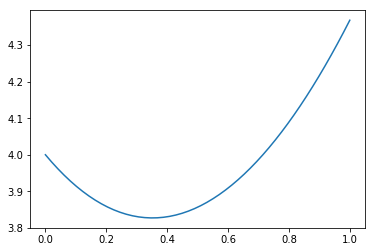

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,1)
y = x**2+np.exp(-x)+3

plt.plot(x,y)

In [2]:
def Newton(x):
    return x - (2*x-np.exp(-x))/(2+np.exp(-x))

x = 0.0
for i in range(5):
    x = Newton(x)
    print(x)

0.333333333333
0.351689331555
0.351733710993
0.351733711249
0.351733711249


## Newton para resolução de sistemas não-lineares

Agora temos um campo vetorial $\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m$ e queremos resolver

$$
\mathbf{f(x)} = \mathbf{0}.
$$


In [10]:
def Newton2(t,alpha):
    x = np.array([t,alpha])
    f = np.array([t-1+t*np.cos(alpha), 1-np.exp(-t)-t*np.sin(alpha)+t**2/10])
    J = np.array([[1+np.cos(alpha), -t*np.sin(alpha)],[np.exp(-t)-np.sin(alpha)+t/5,  -t*np.cos(alpha)]])
    x = x - np.linalg.inv(J).dot(f)
    return x[0],x[1]

t = 0.1
alpha = 0.1
for i in range(15):
    t,alpha = Newton2(t,alpha)
    print(t,alpha)

(0.52314331420765037, 4.4745964375948386)
(-0.21047298817699367, 6.7579238532998609)
(0.66870533186555425, 4.0194943630235009)
(-0.83407167048330155, 6.5487247633725101)
(0.78953707572860798, 4.0295893808544854)
(-0.86280396038753104, 6.1819774990133638)
(0.42141116329936534, 4.3541961901548589)
(-0.29568732329170877, 7.3745414292647311)
(1.5591986961477236, 2.5015394418518708)
(5.8947399666771378, 2.680640670088791)
(4.7593095950330042, 2.4886990196253405)
(4.2163437235453012, 2.4427594115163571)
(4.1421071781701269, 2.4320450870082739)
(4.1402344138735012, 2.431755225451488)
(4.1402331675146913, 2.4317550317137711)


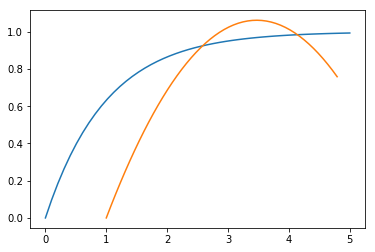

In [17]:
t = np.linspace(0,5)
xM = t
yM = 1 - np.exp(-t)
xI = 1-t*np.cos(alpha)
yI = t*np.sin(alpha) - t**2/10


plt.plot(xM,yM,xI,yI)

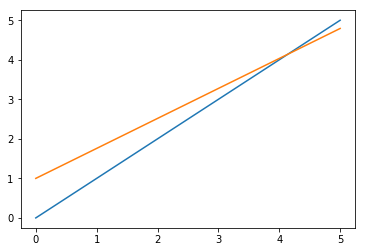

In [16]:

plt.plot(t,xM,t,xI)

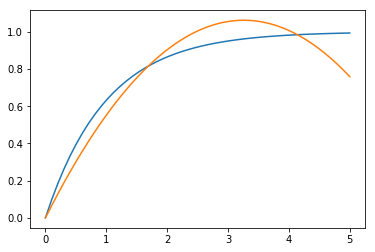

In [15]:
plt.plot(t,yM,t,yI)

## Newton para otimização sobre múltiplas variáveis

Para encontrarmos os ótimos locais (ou pontos críticos) de uma função $g: \mathbb{R}^n \rightarrow \mathbb{R}$ sem restrições, precisamos resolver o sistema

$$
\nabla g = \mathbf{0},
$$

onde $\nabla g$ denota o gradiente da função $g$. Vamos definir um campo vetorial $\mathbf{f} = \nabla g$. Note que quando  $\mathbf{f} = \mathbf{0}$ é um sistema não-linear, podemos usar o método de Newton multivariado para resolvê-lo. A equação de iteração de Newton é

$$
\mathbf{x}_{n+1} = \mathbf{x}_{n} - \left(\mathbf{J}_\mathbf{f}(\mathbf{x}_n)\right)^{-1}  \mathbf{f}(\mathbf{x}_n),
$$

onde $\mathbf{J}_\mathbf{f}(\mathbf{x}_n)$ é o Jacobiano de $\mathbf{f}$ calculado em $\mathbf{x}_n$. Ou equivalentemente,

$$
\mathbf{x}_{n+1} = \mathbf{x}_{n} - \left(\nabla^2 g (\mathbf{x}_n)\right)^{-1}  \nabla g (\mathbf{x}_n),
$$

onde $\nabla^2 g (\mathbf{x}_n)$ é a Hessiana de $g$ calculada em $\mathbf{x}_n$. 

In [27]:
import numpy as np


def NewtonRegressaoLogistica(theta0, x, y):
    theta = theta0
    for i in range(10):
        # calculo de p
        p = 1/(1+np.exp(-(theta[0]+theta[1]*x)))
        
        # calculo da derivada primeira
        dl = np.array([y.sum() - p.sum(),
                     (x*y).sum() - (x*p).sum()])
        
        # calculo da derivada segunda
        pq = p*(1-p)
        Jl = np.array([[-pq.sum(),     -(x*pq).sum()],
                         [-(x*pq).sum(), -(x**2 *pq).sum()]])
    
        # equacao de iteracao
        theta = theta - np.linalg.inv(Jl).dot(dl)
        print(theta)
    return theta

alpha0 = 0.0
beta0 = 0.0
theta0 = [alpha0, beta0] 

x = np.array([9,10,11,12,13,14,15,16,17,18])
y = np.array([0,1,0,0,0,1,1,0,1,1])

theta = NewtonRegressaoLogistica(theta0, x, y)

[-4.25454545  0.31515152]
[-4.86914973  0.36067776]
[-4.89852406  0.36285363]
[-4.89859095  0.36285859]
[-4.89859095  0.36285859]
[-4.89859095  0.36285859]
[-4.89859095  0.36285859]
[-4.89859095  0.36285859]
[-4.89859095  0.36285859]
[-4.89859095  0.36285859]


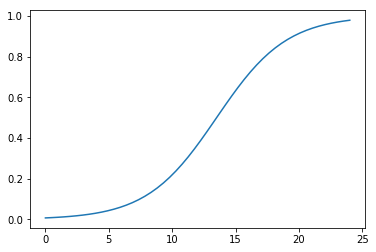

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

xpoints = np.linspace(0,24)
ypoints = 1/(1+np.exp(-(theta[0]+theta[1]*xpoints)))

plt.plot(xpoints,ypoints)